# Introduction to Data Science 
# Lecture 19: Clustering 2
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

In this lecture, we'll continue our discussion of clustering, covering
* agglomerative clustering 
* dendogram plots
* distances
* comparison of clustering methods on MNIST digits

Recommended Reading:
* G. James, D. Witten, T. Hastie, and R. Tibshirani, An Introduction to Statistical Learning, Ch. 10.1 and 10.3. [digitial version available here](http://www-bcf.usc.edu/~gareth/ISL/)
* J. Grus, Data Science from Scratch, Ch. 19
* [scikit-learn documentation on clustering](http://scikit-learn.org/stable/modules/clustering.html)
* [Jörn's SciPy Hierarchical Clustering and Dendrogram Tutorial](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/)

## Recap: Supervised vs. Unsupervised Learning

### Supervised Learning
**Data:** both the features, $x$, and a response, $y$, for each item in the dataset.

**Goal:** 'learn' how to predict the response from the features.

**Examples:**
* Regression
* Classification


### Unsupervised Learning 
**Data:** Only the features, $x$, for each item in the dataset.

**Goal:** discover 'interesting' things about the dataset.

**Examples:**
* Clustering
* Dimensionality reduction, Principal Component Analysis (PCA)

## Clustering

[Clustering](https://en.wikipedia.org/wiki/Cluster_analysis) is the task of discovering unknown subgroups in data, which we call *clusters*.  In other words, the **goal** is to partition the datset into clusters where ‘similar’ items are in the same cluster and ‘dissimilar’ items are in different clusters. 

**Examples:**
* Social Network Analysis: Clustering can be used to find communities
* Ecology: cluster organisms that share attributes into species, genus, etc...
* Handwritten digits where the digits are unknown

## The k-means clustering method

**Data:**  A collection of points $\{x_i\}$, for $i = 1,\ldots n$, where $x_i\in \mathbb R^d$. 

In [k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering), one tries to find $k$ *centers*, $\{\mu_\ell\}$, $\ell = 1,\ldots k$, and assign each point $x$ to a *cluster* $C_\ell$ with center $\mu_\ell$, as to minimize the *total inntra-cluster distance* 
$$
\arg\min_{\mu, C} \sum_{\ell=1}^k \sum_{x_i \in C_\ell} \| x_i - \mu_\ell\|^2. 
$$
Here, $\mu_\ell$ is the mean of points in $C_\ell$. The total intra-cluster distance is the total squared Euclidean distance from each point to the center of its cluster. It's a measure of the varaince or internal coherence of the clusters. 

### Lloyd's Algorithm


**Input:** set of points $x_1,\ldots, x_n$ and an integer $k$ (# clusters)

Pick $k$ starting points as centers $\mu_1, \ldots, \mu_k$.

** while** not converged:
1. Assign each point $x_i$, to the cluster $C_\ell$ with closest center $\mu_\ell$. 
2. For each cluster $C_\ell$, compute a new center, $\mu_\ell$, by taking the mean of all $x_i$ assigned to cluster $C_\ell$, *i.e.*, 
$$
\mu_\ell = \frac{1}{|C_\ell|}\sum_{x_i \in C_\ell} x_i
$$


### Performance and properties of k-means

* The run time is $O(n*k*d*i)$ where 
 - n is the number of items,
 - k is the number of clusters
 - d is the number of dimensions of the feature vectors
 - i is the number of iterations needed until convergence. 
 
  For data that has well-defined clusters, $i$ is typically small. In practice, the $k$-means algorithm is very fast. 

* Lloyds algorithm finds a *local optimum*, not necessarily the *global optimum*

  Since the algorithm is fast, it is common to run the algorithm multiple times and pick the solution with the smallest total intra-cluster distance, 
$$
\sum_{\ell=1}^k \sum_{x_i \in C_\ell} \| x_i - \mu_\ell\|^2. 
$$

* The total intra-cluster distance doesn't increase at every iteration of Lloyd's algorithm

* The total intra-cluster distance decreases with larger $k$

## Cluster evaluation 

### Evaluating clusters without ground-truth labels

1. Visual comparison
+ Use the total intra-cluster distance (useful for k-means)
+ [Silhouette analysis](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)


### Evaluating cluster quality with known ground-truth labels

1. [`homogeneity_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html): Homogeneity metric of a cluster labeling given a ground truth. A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
+ [`completeness_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html): A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
+ [`v_measure_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html): The V-measure is the harmonic mean between homogeneity and completeness:
$$
v = 2 * (homogeneity * completeness) / (homogeneity + completeness)
$$
+ [`homogeneity_completeness_v_measure`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_completeness_v_measure.html): Compute the homogeneity, completeness, and v-Measure scores at once.
+ Confusion matrix 

## Hierarchical Clustering

[Hierarchical Clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering) is a collection of methods for clustering, where we don't just find a single clustering of the data, but a hierarchy of clusters. There are two main strategies for hierarchical clustering:

1. **Agglomerative:** This "bottom up" approach to clustering starts with each data point in its own cluster. Pairs of clusters are merged as one moves up the hierarchy.

+ **Divisive:** This "top down" approach to clustering starts with all observations in one cluster. Splits of the clusters are made recursively as one moves down the hierarchy.

We'll focus on Agglomerative Clustering and use the `AgglomerativeClustering` function in  scikit-learn.


### Agglomerative clustering
* Start with each item as it’s own cluster.
+ Link together the two clusters that are 'closest together' and store this information in the dendrogram plot. 
+ Continue this process until there is only one cluster.
+ Using the dendrogram plot, decide which clustering is best.

<img src="dendrogram.png" width="500">

### Linkage methods in Agglomerative clustering:
* **Maximum or complete linkage**: the maximum distance between observations of pairs of clusters, 
$$
\max\{d(a,b)\colon a \in A, b \in B \}.
$$

* **Minimum linkage**: the minimum distance between observations of pairs of clusters, 
$$
\min\{d(a,b)\colon a \in A, b \in B \}.
$$

* **Average linkage**: the average of the distances between all observations of pairs of clusters,
$$
\frac{1}{|A| |B|} \sum_{a \in A, b \in B} d(a, b).
$$

* **Centroid distance**:  if $c_A$ and $c_B$ are the centers of clusters $A$ and $B$, then $d(c_A,c_B)$.

* **Ward** minimizes the total inner-cluster distance, similiar to as in $k$-means.  

In [1]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
#import pandas as pd

from sklearn import metrics
from sklearn.datasets import make_blobs, make_moons, load_iris, load_digits
from sklearn.cluster import *
# from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import homogeneity_score, homogeneity_completeness_v_measure
from sklearn.preprocessing import scale

from time import time

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Create color maps
cmap = ListedColormap(["Red","Green","Blue"])
# cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Example: blob dataset

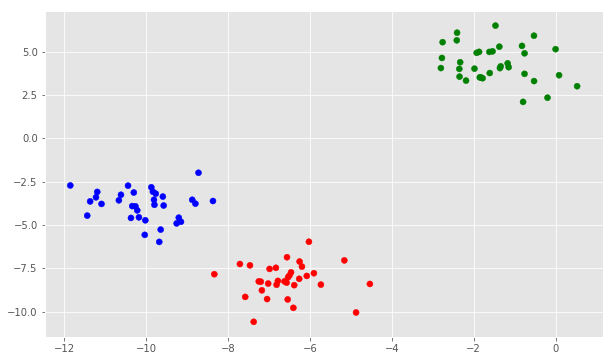

In [2]:
X, y = make_blobs(n_samples=100, centers=3, random_state=1)

# if we know there are 3 clusters
agg_cluster_model = AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=3)
y_pred = agg_cluster_model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap); 

### Making a dendogram plot

A [dendogram plot](https://en.wikipedia.org/wiki/Dendrogram) can be used to decide the number, $k$, of clusters.

The `scipy.cluster.hierarchy` function [`linkage`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) returns an array of length $n-1$ that contains all cluster merging information. Each row has the format 
`[idx1, idx2, dist, sample_count]`.

The `scipy.cluster.hierarchy` function [`fcluster`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.fcluster.html) can then be used to extract the clusters from the linkage array. 

In [3]:
Z = linkage(X, 'ward') # generate the linkage array
print(Z[:5])

[[  3.30000000e+01   6.80000000e+01   2.17280603e-02   2.00000000e+00]
 [  3.50000000e+01   3.90000000e+01   5.30292015e-02   2.00000000e+00]
 [  1.80000000e+01   2.10000000e+01   7.84081035e-02   2.00000000e+00]
 [  3.00000000e+01   9.20000000e+01   8.15250312e-02   2.00000000e+00]
 [  5.40000000e+01   5.80000000e+01   8.51937937e-02   2.00000000e+00]]


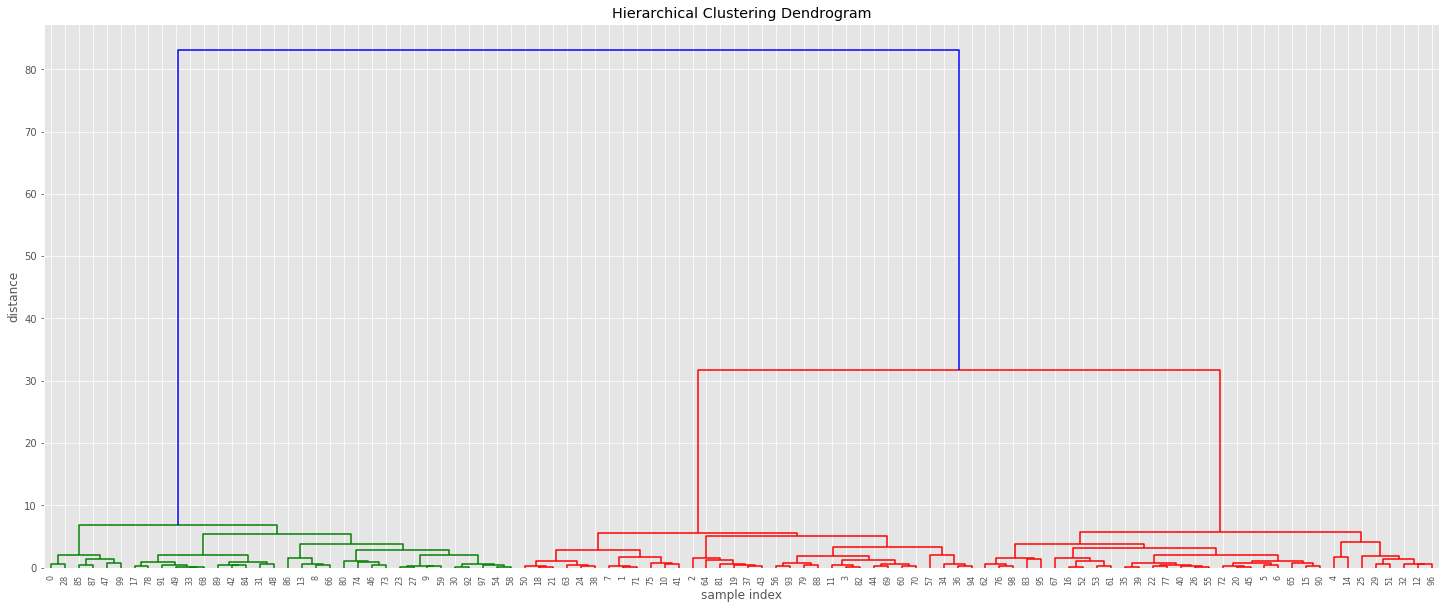

In [4]:
# dendrogram plot
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

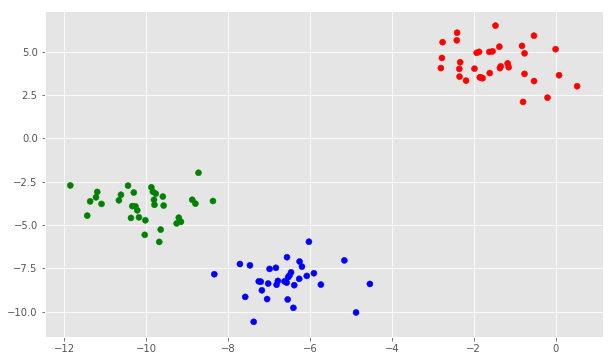

In [5]:
y_pred = fcluster(Z=Z, t=3, criterion='maxclust')
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap); 

## Example: two moons dataset

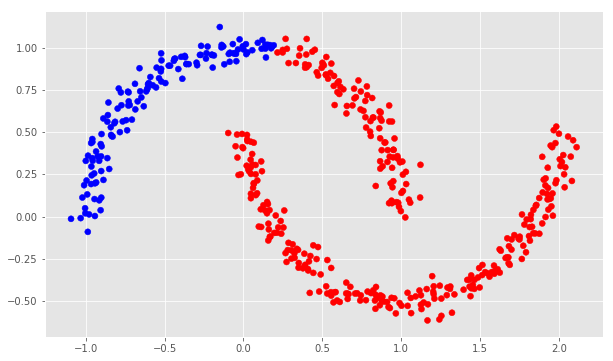

In [6]:
X_moons, y = make_moons(n_samples=500, noise=.05)

agg_cluster_model = AgglomerativeClustering(linkage="complete", affinity='euclidean', n_clusters=2)
y_pred = agg_cluster_model.fit_predict(X_moons)

plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_pred,  marker="o", cmap=cmap);

### Adding connectivity constraints

Previously, we joined clusters based soley on distance. Here we introduce a [connectivity constraint](http://scikit-learn.org/stable/auto_examples/cluster/plot_ward_structured_vs_unstructured.html#sphx-glr-auto-examples-cluster-plot-ward-structured-vs-unstructured-py) based on k-Nearest Neighbors graph so that only adjacent clusters can be merged together. 

/Users/travistiner/anaconda3/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:426: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


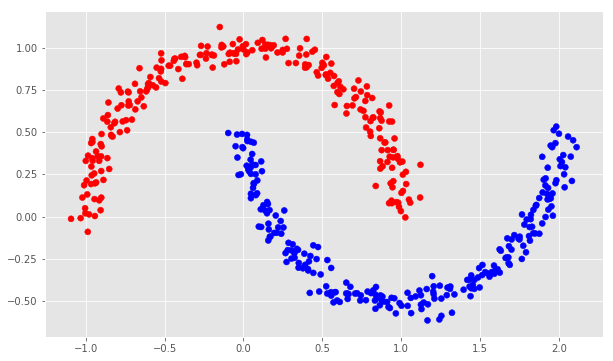

In [7]:
connectivity = kneighbors_graph(X_moons, n_neighbors=10, include_self=False)

agg_cluster_model = AgglomerativeClustering(linkage="complete", connectivity=connectivity, n_clusters=2,compute_full_tree=True)
y_pred = agg_cluster_model.fit_predict(X_moons)

plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_pred,  marker="o", cmap=cmap);


## Example: IRIS Dataset

Recall the Iris dataset consists of 4 measurements for 150 different examples of irises. We know that there are $k=3$  species of irises in the dataset. Without using the labels, let's try to find them. Note: this is a harder problem than classification since we're not using the (known) labels! 

In [8]:
# load dataset 
iris = load_iris()

X = iris.data
y = iris.target

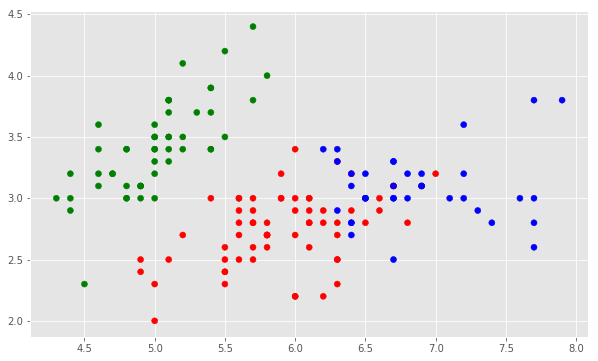

In [9]:
agg_cluster_model = AgglomerativeClustering(linkage="ward", affinity='euclidean', n_clusters=3)
y_pred = agg_cluster_model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

### Evaluating the clusters

As we saw last time, we can use the sklearn function [`homogeneity_completeness_v_measure`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_completeness_v_measure.html) to compute the homogeneity, completeness, and v-Measure scores at once.

In [10]:
homogeneity_completeness_v_measure(labels_true = y, labels_pred = y_pred)

(0.76080084697187234, 0.77959580055911437, 0.77008366164878694)

In [11]:
models = [AgglomerativeClustering(linkage="ward", affinity='euclidean', n_clusters=3), 
         AgglomerativeClustering(linkage="average", affinity='euclidean', n_clusters=3), 
         AgglomerativeClustering(linkage="complete", affinity='euclidean', n_clusters=3), 
         AgglomerativeClustering(linkage="average", affinity='manhattan', n_clusters=3),
         AgglomerativeClustering(linkage="complete", affinity='manhattan', n_clusters=3),
         KMeans(n_clusters=3)]
h = np.zeros([len(models),3])
for i,m in enumerate(models):
    y_pred = m.fit_predict(X)
    h[i,:] = homogeneity_completeness_v_measure(labels_true = y, labels_pred = y_pred)
    print(h[i,:])

print('The winner is model #' + str(np.argmax(h[:,0]))
      + ' with homogeneity score ' + str(np.max(h[:,0])))
print('Method details:')
print(models[np.argmax(h[:,0])])


[ 0.76080085  0.7795958   0.77008366]
[ 0.79598162  0.81564569  0.80569369]
[ 0.70011544  0.74543828  0.72206635]
[ 0.76959557  0.78590169  0.77766316]
[ 0.77817687  0.80358854  0.79067858]
[ 0.7514854   0.76498615  0.75817568]
The winner is model #1 with homogeneity score 0.795981622781
Method details:
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=3, pooling_func=<function mean at 0x106c4b1e0>)


## Measures of distance
1. **Euclidean distance**:
$$
d(x,y) = \sqrt{\sum_{i=1}^d (x_i - y_i)^2 }
$$
+ **Manhattan distance**:
$$
d(x,y) = \sqrt{\sum_{i=1}^d |x_i - y_i| }
$$
+ **Correlation**: 
$$\frac{\sum ^n _{i=1}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum ^n _{i=1}(x_i - \bar{x})^2} \sqrt{\sum ^n _{i=1}(y_i - \bar{y})^2}}
$$
where $\bar{x}=\frac{1}{n}\sum_{i=1}^n x_i$ and $\bar{y}=\frac{1}{n}\sum_{i=1}^n y_i$ are the means.
+ If $A$ and $B$ are two sets, we define the Jaccard similarity coefficient
$$
J(A,B) = \frac{ |A\cap B|}{ |A\cup B| }.
$$
We always have that $0 \leq J(A,B) \leq 1$. We then define the **Jaccard  distance** as 
$$
d(A,B) = 1 - J(A,B).
$$

## Example: MNIST dataset

The MNIST handwritten digit dataset consists of images of handwritten digits, together with labels indicating which digit is in each image. 

Becaue both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various methods. 
For example, [this webpage](http://yann.lecun.com/exdb/mnist/) describes a variety of different classification results on MNIST (Note, the tests on this website are for a larger and higher resolution dataset than we'll use.) To see a comparison of classification methods implemented in scikit-learn on the MNIST dataset, see 
[this page](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html).
The MNIST dataset is also a frequently used for benchmarking clustering algorithms and because it has labels, we can evaluate the homogeneity or purity of the clusters. 

There are several versions of the dataset. We'll use the one that is built-in to scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

* Classes: 10  
* Samples per class: $\approx$180
* Samples total: 1797
* Dimensionality: 64 (8 pixels by 8 pixels)
* Features: integers 0-16

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


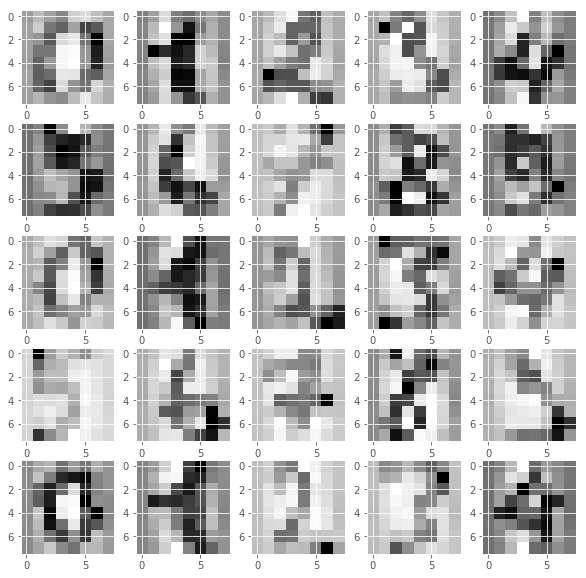

In [22]:
digits = load_digits()
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

plt.figure(figsize= (10, 10))
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='none')
plt.show()

## MNIST: k-means clustering
We first use k-means method to cluster the dataset and compute the homogeneity score for the clustering. 

In [23]:
# fit k-means to data
kmeans_model = KMeans(n_clusters=n_digits, n_init=10)
kmeans_model.fit(X)

# use labels to compute homogeneity score
metrics.homogeneity_score(labels_true=y, labels_pred=kmeans_model.labels_)

0.64899263884889746

## MNIST: Hierarchical clustering
**Exercise:** Use a hierarchical clustering method to cluster the dataset. Again compute the homogeneity. 

*Hint:* Use the scikit-learn function *AgglomerativeClustering*.  

In [30]:
agg_cluster_model = AgglomerativeClustering(linkage="ward", affinity='euclidean', n_clusters=10)
y_pred = agg_cluster_model.fit_predict(X)
metrics.homogeneity_score(y, y_pred)

0.75849140703260054

## MNIST: Other clustering methods
Take a look at the clustering methods and options for various methods on the [scikit-learn page](http://scikit-learn.org/stable/modules/clustering.html). 

**Exercise:** By modifying the following code, try to find the clustering method with the largest homogeneity score for this dataset. 

In [34]:
print(50 * '_')
print('% 9s' % 'method' + '                   time' + '      homo')
def compare_method(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 25s   %.2fs     %.3f ' % (name, (time() - t0), metrics.homogeneity_score(y, estimator.labels_)))

compare_method(KMeans(init='k-means++', n_clusters=n_digits, n_init=10), name="k-means++", data=X)
compare_method(KMeans(init='random', n_clusters=n_digits, n_init=10), name="random", data=X)
compare_method(AgglomerativeClustering(linkage="ward", affinity='euclidean', n_clusters=10),name="ward",data=X)
compare_method(AffinityPropagation(),name="ward",data=X)

__________________________________________________
   method                   time      homo
                k-means++   0.29s     0.674 
                   random   0.17s     0.596 
                     ward   0.19s     0.758 
                     ward   3.94s     0.932 
